### Работа с выбросами

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [5]:
df.shape

(10000, 20)

Удалим столбец в котором слишком много пропусков

In [6]:
df=df.drop(['Healthcare_1','Id'], axis=1)
df

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,0,0,B,305018.871089
1,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1,0,B,177734.553407
2,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,3,1,B,282078.720850
3,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,0,1,B,168106.007630
4,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,1,9,B,119367.455796
9996,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,0,0,A,199715.148807
9997,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,1,5,B,165953.912580
9998,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,3,5,B,171842.411855


In [7]:
df['LifeSquare'] = df['Square'] - df['KitchenSquare'] - 6

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     10000 non-null  float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Helthcare_2    10000 non-null  int64  
 15  Shops_1        10000 non-null  int64  
 16  Shops_2        10000 non-null  object 
 17  Price          10000 non-null  float64
dtypes: floa

Переведем категориальные признаки на числовые

In [11]:
df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [12]:
df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [13]:
df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [18]:
col = df.select_dtypes(include='object').columns.tolist()
col

['Ecology_2', 'Ecology_3', 'Shops_2']

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# df.loc[:, col] = df[:, col].apply(labeler.fit_transform)
# df.head()
df['Ecology_2'] = le.fit_transform(df['Ecology_2'])
df['Ecology_3'] = le.fit_transform(df['Ecology_3'])
df['Shops_2'] = le.fit_transform(df['Shops_2'])

In [21]:
df

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,27,3.0,115.027311,99.027311,10.0,4,10.0,2014,0.075424,1,1,11,3097,0,0,0,1,305018.871089
1,22,1.0,39.832524,25.832524,8.0,7,8.0,1966,0.118537,1,1,30,6207,1,1,0,1,177734.553407
2,1,3.0,78.342215,62.342215,10.0,2,17.0,1988,0.025609,1,1,33,5261,0,3,1,1,282078.720850
3,1,1.0,40.409907,33.409907,1.0,10,22.0,1977,0.007122,1,1,1,264,0,0,1,1,168106.007630
4,94,2.0,64.285067,49.285067,9.0,16,16.0,1972,0.282798,1,1,33,8667,2,0,6,1,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,61,2.0,49.090728,37.090728,6.0,3,12.0,1981,0.300323,1,1,52,10311,6,1,9,1,119367.455796
9996,27,2.0,64.307684,49.307684,9.0,13,0.0,1977,0.072158,1,1,2,629,1,0,0,0,199715.148807
9997,178,1.0,29.648057,18.648057,5.0,3,5.0,1958,0.460556,1,1,20,4386,14,1,5,1,165953.912580
9998,21,1.0,32.330292,21.330292,5.0,3,9.0,1969,0.194489,1,1,47,8004,3,3,5,1,171842.411855


In [ ]:
sns.boxplot(data=df['Price'])

In [65]:
def outliers_iqr(x):
    quartile_1, quartile_3 = np.percentile(x, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))[0], x[(x <= upper_bound) | (x >= lower_bound)].min(), x[(x <= upper_bound) | (x >= lower_bound)].max()

In [ ]:
df['Price']=np.log[]

In [25]:
def outliers_z_score(x, threshold=3):
    mean = np.mean(x)
    std = np.std(x)
    z_scores = [(element - mean) / std for element in x]
    return np.where(np.abs(z_scores) > threshold)[0]

In [26]:
price_outliers_index = outliers_z_score(df['Price'])

In [27]:
len(price_outliers_index)

175

In [28]:
from scipy.stats import norm

def estimate_gaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma
    
def get_gaussian(mu, sigma):
    distribution = norm(mu, sigma)
    return distribution

def get_probs(distribution, dataset):
    return distribution.pdf(dataset)

In [29]:
mu, sigma = estimate_gaussian(df['Price'])
distribution = get_gaussian(mu, sigma)
probabilities = get_probs(distribution, df['Price'])
probabilities

array([4.62527672e-11, 4.62527672e-11, 4.62527672e-11, ...,
       4.62527672e-11, 4.62527672e-11, 4.62527672e-11])

In [30]:
probabilities.max()

4.625276723644675e-11

In [31]:
price_outliers_index = np.where(probabilities < 4.62527672e-11)[0]

In [32]:
len(price_outliers_index)

61

Rooms

In [33]:
df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [ ]:
Rooms_outlier_index = df.loc[(df['Rooms'] == 0)] | (df['Rooms'] >= 6)].index()

In [ ]:
df.loc[df['Rooms'] == 0, 'Rooms'] = 1


In [35]:
df['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
30.0         2
43.0         2
41.0         2
112.0        2
25.0         2
51.0         2
37.0         2
58.0         2
32.0         2
21.0         1
73.0         1
75.0         1
36.0         1
27.0         1
63.0         1
1970.0       1
54.0         1
53.0         1
60.0         1
26.0         1
66.0         1
39.0         1
29.0         1
78.0         1
31.0         1
84.0         1
48.0         1
96.0         1
42.0         1
40.0         1
23.0         1
72.0         1
35.0         1
62.0         1
123.0        1
2014.0       1
Name: KitchenSquare, dtype: int64

In [36]:
kitchenSquare_outliers_index = df.loc[(df['KitchenSquare'] < 3) | (df['KitchenSquare'] > 13)]

In [48]:
kitchenSquare_outlier_index = df.loc[(df['KitchenSquare'] < 3) | (df['KitchenSquare'] > 13)].index

In [37]:
len(kitchenSquare_outliers_index)

3350

In [38]:
df.loc[df['KitchenSquare'] > 13, 'KitchenSquare'] = df['KitchenSquare'].median()

In [41]:
df.loc[df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [42]:
df['KitchenSquare'].value_counts()

3.0     3183
8.0     1306
6.0     1227
5.0     1169
10.0    1075
9.0      843
7.0      609
12.0     249
11.0     233
13.0      67
4.0       39
Name: KitchenSquare, dtype: int64

In [49]:
df['KitchenSquare_outlier'] = 0 
df.loc[kitchenSquare_outlier_index, 'KitchenSquare_outlier'] = 1

In [50]:
df['KitchenSquare_outlier'].value_counts()

0    10000
Name: KitchenSquare_outlier, dtype: int64

HouseFloor

In [46]:
df['HouseFloor'].value_counts()

17.0     2331
9.0      1389
12.0     1074
5.0      1031
14.0      625
16.0      576
1.0       497
25.0      374
22.0      343
0.0       269
24.0      176
8.0       141
10.0      135
4.0       134
3.0       127
15.0      123
19.0      108
20.0      105
18.0       89
7.0        59
6.0        58
2.0        48
23.0       40
21.0       33
11.0       28
13.0       27
30.0       21
40.0        7
27.0        6
32.0        4
37.0        4
28.0        3
99.0        2
39.0        2
48.0        2
47.0        1
38.0        1
36.0        1
29.0        1
44.0        1
31.0        1
117.0       1
45.0        1
26.0        1
Name: HouseFloor, dtype: int64

In [51]:
df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int64)

In [52]:
df

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,KitchenSquare_outlier
0,27,3.0,115.027311,99.027311,10.0,4,10.0,2014,0.075424,1,1,11,3097,0,0,0,1,305018.871089,0
1,22,1.0,39.832524,25.832524,8.0,7,8.0,1966,0.118537,1,1,30,6207,1,1,0,1,177734.553407,0
2,1,3.0,78.342215,62.342215,10.0,2,17.0,1988,0.025609,1,1,33,5261,0,3,1,1,282078.720850,0
3,1,1.0,40.409907,33.409907,3.0,10,22.0,1977,0.007122,1,1,1,264,0,0,1,1,168106.007630,0
4,94,2.0,64.285067,49.285067,9.0,16,16.0,1972,0.282798,1,1,33,8667,2,0,6,1,343995.102962,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,61,2.0,49.090728,37.090728,6.0,3,12.0,1981,0.300323,1,1,52,10311,6,1,9,1,119367.455796,0
9996,27,2.0,64.307684,49.307684,9.0,13,0.0,1977,0.072158,1,1,2,629,1,0,0,0,199715.148807,0
9997,178,1.0,29.648057,18.648057,5.0,3,5.0,1958,0.460556,1,1,20,4386,14,1,5,1,165953.912580,0
9998,21,1.0,32.330292,21.330292,5.0,3,9.0,1969,0.194489,1,1,47,8004,3,3,5,1,171842.411855,0


In [53]:
df['HouseYear'].value_counts()

1977        2652
2017         308
2016         305
2015         299
2014         210
            ... 
1928           1
1910           1
1916           1
4968           1
20052011       1
Name: HouseYear, Length: 97, dtype: int64

In [57]:
houseYear_outlier_index = df.loc[(df['HouseYear'] == 20052011) | (df['HouseYear'] == 4968)].index

In [58]:
df.loc[df['HouseYear'] == 20052011, 'HouseYear'] = 2008
df.loc[df['HouseYear'] == 4968, 'HouseYear'] = 2023

In [59]:
df['HouseYear_outlier'] = 0 
df.loc[houseYear_outlier_index, 'HouseYear'] = 1

In [60]:
df['HouseYear_outlier'].value_counts()

0    10000
Name: HouseYear_outlier, dtype: int64

Ecology_1

<AxesSubplot:>

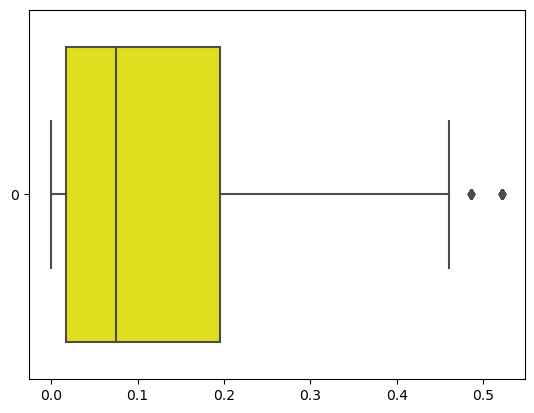

In [61]:
sns.boxplot(data=df.Ecology_1, color='yellow', orient='h')

In [66]:
ecology_1_outliers, min_border, max_border = outliers_iqr(df['Ecology_1'])

In [67]:
len(ecology_1_outliers)

61

In [68]:
min_border, max_border

(0.0, 0.521867054)

In [73]:
df.loc[ecology_1_outliers, 'Ecology_1'] = np.nan

Social_1

<AxesSubplot:>

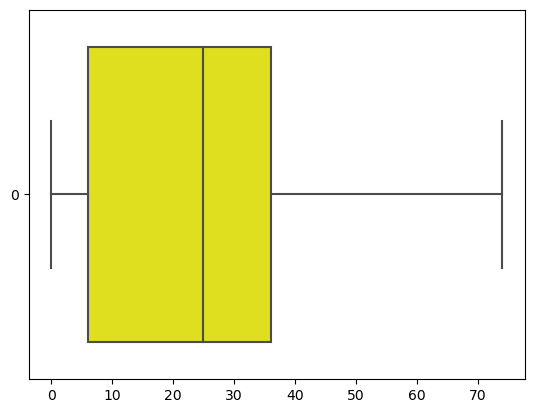

In [69]:
sns.boxplot(data=df.Social_1, color='yellow', orient='h')

In [70]:
df['Social_1'].value_counts()

2     688
1     654
25    557
5     528
30    465
23    434
6     377
22    367
53    355
34    311
33    252
46    245
31    243
43    238
9     213
36    209
21    207
37    205
24    205
52    201
0     201
35    200
47    177
74    176
39    159
27    151
28    144
4     141
11    138
42    129
26    127
16    123
19    118
66     99
17     96
49     95
18     92
32     87
41     83
50     79
29     70
38     64
8      62
15     51
20     50
14     46
10     24
13     22
12     18
7      15
3       9
Name: Social_1, dtype: int64

<AxesSubplot:>

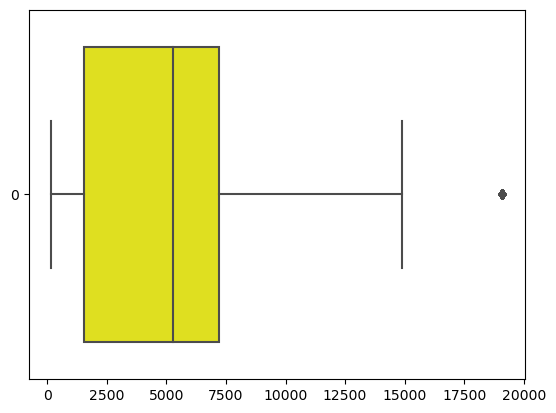

In [71]:
sns.boxplot(data=df.Social_2, color='yellow', orient='h')

In [74]:
social_2_outliers, min_border, max_border = outliers_iqr(df['Social_2'])

In [75]:
len(social_2_outliers)

176

In [76]:
min_border, max_border

(168, 19083)

In [77]:
df.loc[social_2_outliers, 'Social_2'] = np.nan

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DistrictId             10000 non-null  int64  
 1   Rooms                  10000 non-null  float64
 2   Square                 10000 non-null  float64
 3   LifeSquare             10000 non-null  float64
 4   KitchenSquare          10000 non-null  float64
 5   Floor                  10000 non-null  int64  
 6   HouseFloor             10000 non-null  float64
 7   HouseYear              10000 non-null  int64  
 8   Ecology_1              9939 non-null   float64
 9   Ecology_2              10000 non-null  int64  
 10  Ecology_3              10000 non-null  int32  
 11  Social_1               10000 non-null  int64  
 12  Social_2               9824 non-null   float64
 13  Social_3               10000 non-null  int64  
 14  Helthcare_2            10000 non-null  int64  
 15  Sho

In [79]:
df = df.dropna()

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9763 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DistrictId             9763 non-null   int64  
 1   Rooms                  9763 non-null   float64
 2   Square                 9763 non-null   float64
 3   LifeSquare             9763 non-null   float64
 4   KitchenSquare          9763 non-null   float64
 5   Floor                  9763 non-null   int64  
 6   HouseFloor             9763 non-null   float64
 7   HouseYear              9763 non-null   int64  
 8   Ecology_1              9763 non-null   float64
 9   Ecology_2              9763 non-null   int64  
 10  Ecology_3              9763 non-null   int32  
 11  Social_1               9763 non-null   int64  
 12  Social_2               9763 non-null   float64
 13  Social_3               9763 non-null   int64  
 14  Helthcare_2            9763 non-null   int64  
 15  Shop

In [107]:
df = pd.read_csv("cars_sampled.csv")
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [108]:
df=df.drop(['dateCrawled','name', 'seller', 'offerType', 'abtest', 'vehicleType', 'gearbox','model','fuelType','brand', 'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen'], axis=1)
df

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
0,4450,2003,150,150000,3
1,13299,2005,163,150000,6
2,3200,2003,101,150000,11
3,4500,2006,86,60000,12
4,18750,2008,185,150000,11
...,...,...,...,...,...
49996,0,2005,0,150000,0
49997,19999,1990,0,5000,0
49998,0,2004,0,150000,1
49999,100,2000,0,150000,8


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   price                50001 non-null  int64
 1   yearOfRegistration   50001 non-null  int64
 2   powerPS              50001 non-null  int64
 3   kilometer            50001 non-null  int64
 4   monthOfRegistration  50001 non-null  int64
dtypes: int64(5)
memory usage: 1.9 MB


In [110]:
df['price'].value_counts()

0         1451
500        742
1500       705
1000       647
2500       594
          ... 
103990       1
370000       1
2151         1
225000       1
175000       1
Name: price, Length: 2393, dtype: int64

<AxesSubplot:>

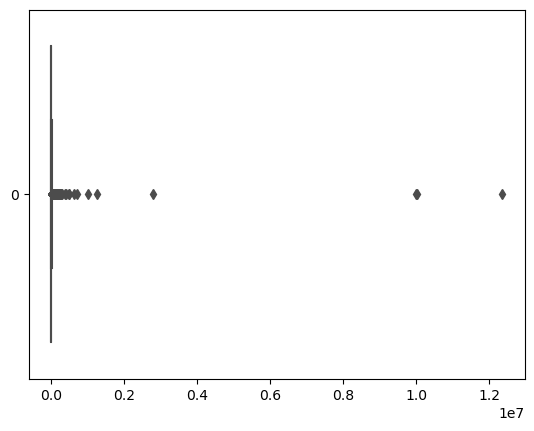

In [111]:
sns.boxplot(data=df.price, color='yellow', orient='h')

In [112]:
price_outliers, min_border, max_border = outliers_iqr(df['price'])

In [113]:
len(price_outliers)

3757

In [114]:
min_border, max_border

(0, 12345678)

In [115]:
df.loc[price_outliers, 'price'] = np.nan

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                46244 non-null  float64
 1   yearOfRegistration   50001 non-null  int64  
 2   powerPS              50001 non-null  int64  
 3   kilometer            50001 non-null  int64  
 4   monthOfRegistration  50001 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 1.9 MB


In [117]:
df['yearOfRegistration'].value_counts()

2000    3315
2005    3131
1999    3055
2001    2804
2003    2756
        ... 
1928       1
2900       1
8500       1
1940       1
1934       1
Name: yearOfRegistration, Length: 97, dtype: int64

In [118]:
yearOfRegistration_outlier_index = df.loc[(df['yearOfRegistration'] > 2023) | (df['yearOfRegistration'] < 1923)].index

In [119]:
len(yearOfRegistration_outlier_index)

48

In [120]:
df.loc[df['yearOfRegistration'] > 2023, 'yearOfRegistration'] = 2023
df.loc[df['yearOfRegistration'] < 1923, 'yearOfRegistration'] = 1923

In [123]:
df['yearOfRegistration_outlier'] = 0 
df.loc[yearOfRegistration_outlier_index, 'yearOfRegistration_outlier'] = 1

In [124]:
df['yearOfRegistration_outlier'].value_counts()

0    49953
1       48
Name: yearOfRegistration_outlier, dtype: int64

In [125]:
df['powerPS'].value_counts()

0      5605
75     3264
60     2167
150    2057
140    1795
       ... 
268       1
416       1
382       1
401       1
386       1
Name: powerPS, Length: 460, dtype: int64

<AxesSubplot:>

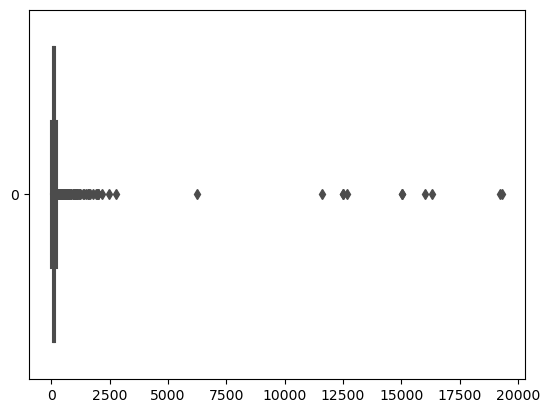

In [126]:
sns.boxplot(data=df.powerPS, color='yellow', orient='h')

In [127]:
powerPS_outliers, min_border, max_border = outliers_iqr(df['powerPS'])

In [128]:
len(powerPS_outliers)

1505

In [129]:
min_border, max_border

(0, 19312)

In [130]:
df.loc[powerPS_outliers, 'powerPS'] = np.nan

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       46244 non-null  float64
 1   yearOfRegistration          50001 non-null  int64  
 2   powerPS                     48496 non-null  float64
 3   kilometer                   50001 non-null  int64  
 4   monthOfRegistration         50001 non-null  int64  
 5   yearOfRegistration_outlier  50001 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 2.3 MB


In [132]:
df['monthOfRegistration'].value_counts()

0     5043
3     4755
6     4449
4     4153
5     4109
7     3897
10    3666
9     3453
11    3436
12    3403
1     3286
8     3240
2     3111
Name: monthOfRegistration, dtype: int64

In [133]:
monthOfRegistration_outlier_index = df.loc[(df['monthOfRegistration'] ==0)].index

In [135]:
len(monthOfRegistration_outlier_index)

5043

In [136]:
df.loc[df['monthOfRegistration'] ==0, 'monthOfRegistration'] = 1

In [137]:
df['monthOfRegistration_outlier'] = 0 
df.loc[monthOfRegistration_outlier_index, 'monthOfRegistration_outlier'] = 1

In [138]:
df['monthOfRegistration_outlier'].value_counts()

0    44958
1     5043
Name: monthOfRegistration_outlier, dtype: int64

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        46244 non-null  float64
 1   yearOfRegistration           50001 non-null  int64  
 2   powerPS                      48496 non-null  float64
 3   kilometer                    50001 non-null  int64  
 4   monthOfRegistration          50001 non-null  int64  
 5   yearOfRegistration_outlier   50001 non-null  int64  
 6   monthOfRegistration_outlier  50001 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 2.7 MB


In [140]:
df['kilometer'].value_counts()

150000    32442
125000     5124
100000     2130
90000      1634
80000      1509
70000      1284
60000      1194
50000      1023
5000       1002
40000       856
30000       787
20000       754
10000       262
Name: kilometer, dtype: int64

In [141]:
mu, sigma = estimate_gaussian(df['kilometer'])
distribution = get_gaussian(mu, sigma)
probabilities = get_probs(distribution, df['kilometer'])
probabilities

array([2.46799836e-10, 2.46799836e-10, 2.46799836e-10, ...,
       2.46799836e-10, 2.46799836e-10, 2.46799836e-10])

In [145]:
kilometer_outliers_index = np.where(probabilities < 2.46799836e-10)[0]

In [146]:
len(kilometer_outliers_index)

4684

In [147]:
df.loc[kilometer_outliers_index, 'kilometer'] = np.nan

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        46244 non-null  float64
 1   yearOfRegistration           50001 non-null  int64  
 2   powerPS                      48496 non-null  float64
 3   kilometer                    45317 non-null  float64
 4   monthOfRegistration          50001 non-null  int64  
 5   yearOfRegistration_outlier   50001 non-null  int64  
 6   monthOfRegistration_outlier  50001 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 2.7 MB


In [149]:
df = df.dropna()

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42282 entries, 0 to 50000
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        42282 non-null  float64
 1   yearOfRegistration           42282 non-null  int64  
 2   powerPS                      42282 non-null  float64
 3   kilometer                    42282 non-null  float64
 4   monthOfRegistration          42282 non-null  int64  
 5   yearOfRegistration_outlier   42282 non-null  int64  
 6   monthOfRegistration_outlier  42282 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 2.6 MB


дз 10-17 последняя методичка (5.4)!!!!